In [1]:
# visual
import matplotlib.pyplot as plt
import os
import numpy as np

In [7]:
# 各个变换程度下，不同方向上的方差
def get_visual_var_average(path_dataset,model,trans_type,direction=None,level=None):
    list_rep_var = {}
    list_num_var = {}
    x=['05','10','15','20','25','30','35','40','45']
    # x=['0','1','2','3','4','5','6','7']
    data_count=0    #统计有多少数据量
    for filename in os.listdir(path_dataset):   #每一张图片
        temp = path_dataset+filename+'/'
        print(temp)

        list_rep={}
        list_num={}
        for typee in os.listdir(temp):          #每一个变换
            # print(typee)
            attribute_list = typee.split('_')
            if(attribute_list[0] != trans_type):
                continue
            if(direction!=None and attribute_list[1] != direction):
                continue
            if(level!=None and attribute_list[2] != level):
                continue
            # print(typee)
            level_temp = attribute_list[2]
            data_count = data_count+1

            dir_temp = temp+typee+'/'
            # print(dir_temp)
            # 读取每一个模型的结果
            for modell in model:                #每一个模型的结果
                # print(modell)
                output_dir = dir_temp+modell+'_result/'
                rep = output_dir+'rep.txt'
                # kp_repeat_num = output_dir+'kp_repeat_num.txt'
                kp_repeat_num = output_dir+'kp_num.txt'
                rep = np.loadtxt(rep,dtype=np.float32, delimiter=' ')
                num = np.loadtxt(kp_repeat_num,dtype=np.float32, delimiter=' ')

                # 重复率
                if modell not in list_rep:
                    list_rep[modell]={}
                if level_temp not in list_rep[modell]:
                    list_rep[modell][level_temp]=[]
                list_rep[modell][level_temp].append(rep.item())
                # list_rep[modell].append(rep.item())
                # 特征点数量
                if modell not in list_num:
                    list_num[modell]={}
                if level_temp not in list_num[modell]:
                    list_num[modell][level_temp]=[]
                list_num[modell][level_temp].append(num.item())
                # list_num[modell].append(num.item())
        # 针对一张图片求在各个方向上的方差
        for modell in model:
            if modell not in list_rep_var:
                list_rep_var[modell]={}
            if modell not in list_num_var:
                list_num_var[modell]={}
            for levell in list_rep[modell]:
                if levell not in list_rep_var[modell]:
                    list_rep_var[modell][levell]=np.std(list_rep[modell][levell])
                else:
                    list_rep_var[modell][levell] =list_rep_var[modell][levell] + np.std(list_rep[modell][levell])
                
            for levell in list_num[modell]:
                if levell not in list_num_var[modell]:
                    list_num_var[modell][levell]=np.std(list_num[modell][levell])
                else:
                    list_num_var[modell][levell] =list_num_var[modell][levell]+ np.std(list_num[modell][levell])
        print(list_rep_var)
        print(list_num_var)

    # 刚才得到了在方向上的std，现在要求average
    list_rep_var_average = {}
    list_num_var_average = {}

    for modell in model:
        list_rep_var_average[modell]=[]
        list_num_var_average[modell]=[]
        for levell in list_rep_var[modell]:
            list_rep_var_average[modell].append(list_rep_var[modell][levell]/(data_count/8/9))
        for levell in list_num_var[modell]:
            list_num_var_average[modell].append(list_num_var[modell][levell]/(data_count/8/9))
    print(list_rep_var_average)
    print(list_num_var_average)
    
    # 绘制曲线
    # 创建一个图像
    plt.figure(figsize=(10,4),dpi=300)

    plt.subplot(1,2,1)
    if 'orb' in model:
        plt.plot(x, list_rep_var_average['orb'], marker='o', linestyle='-', color='blue', label='ORB')
    if 'sift' in model:
        plt.plot(x, list_rep_var_average['sift'], marker='s', linestyle='-', color='yellow', label='SIFT')
    if 'superpoint' in model:
        plt.plot(x, list_rep_var_average['superpoint'], marker='*', linestyle='-', color='green', label='SuperPoint')
    if 'rekd' in model:
        plt.plot(x, list_rep_var_average['rekd'], marker='^', linestyle='-', color='red', label='REKD')
    if 'keynet' in model:
        plt.plot(x, list_rep_var_average['keynet'], marker='+', linestyle='-', color='pink', label='Key.Net')

    # plt.title('rep')
    plt.xlabel('θ')
    plt.ylabel('The Variance of R_avg')

    # 设置y轴的最小值和最大值
    # plt.ylim(0, 100)
    plt.legend()
    
    plt.subplot(1,2,2)
    if 'orb' in model:
        plt.plot(x, list_num_var_average['orb'], marker='o', linestyle='-', color='blue', label='ORB')
    if 'sift' in model:
        plt.plot(x, list_num_var_average['sift'], marker='s', linestyle='-', color='yellow', label='SIFT')
    if 'superpoint' in model:
        plt.plot(x, list_num_var_average['superpoint'], marker='*', linestyle='-', color='green', label='SuperPoint')
    if 'rekd' in model:
        plt.plot(x, list_num_var_average['rekd'], marker='^', linestyle='-', color='red', label='REKD')
    if 'keynet' in model:
        plt.plot(x, list_num_var_average['keynet'], marker='+', linestyle='-', color='pink', label='Key.Net')


    # 设置图像标题和轴标签
    # plt.title('num')
    plt.xlabel('θ')
    plt.ylabel('The Variance of Keypoint Num')

    # 添加图例
    plt.legend()

    # 显示图像
    plt.show()
    # break

In [3]:
path_dataset = 'dataset_res/'
model = ['orb','sift','superpoint','rekd','keynet']
# model = ['orb','sift','superpoint']

# 各个变换程度下在不同方向上的方差

dataset_res/building_0/
{'orb': {'005': 1.5960412418737413, '010': 0.6899948421254459, '015': 1.3481137568756787, '020': 2.3048484856688276, '025': 3.0164244831944487, '030': 3.449964707056729, '035': 2.8000888439075116, '040': 3.2308778526839483, '045': 2.71154078274174}, 'sift': {'005': 0.3256314376040134, '010': 0.34293217923252733, '015': 0.32084719748135454, '020': 0.34602996022385063, '025': 0.4558495215453196, '030': 0.5136206442919033, '035': 0.7306485612279724, '040': 0.49852624771332127, '045': 0.5233013265685688}, 'superpoint': {'005': 1.316896265794506, '010': 1.09193075321698, '015': 0.9713034213105338, '020': 1.0900284119952606, '025': 0.5841785265596096, '030': 1.4060418880604473, '035': 1.2573073982295175, '040': 1.1597056544417068, '045': 1.1220579587205182}, 'rekd': {'005': 0.2895874741024772, '010': 0.6556817242981806, '015': 0.7429981243801799, '020': 0.6915470545824431, '025': 0.9298404831872579, '030': 0.6982860334648845, '035': 0.7700787478122754, '040': 0.706675

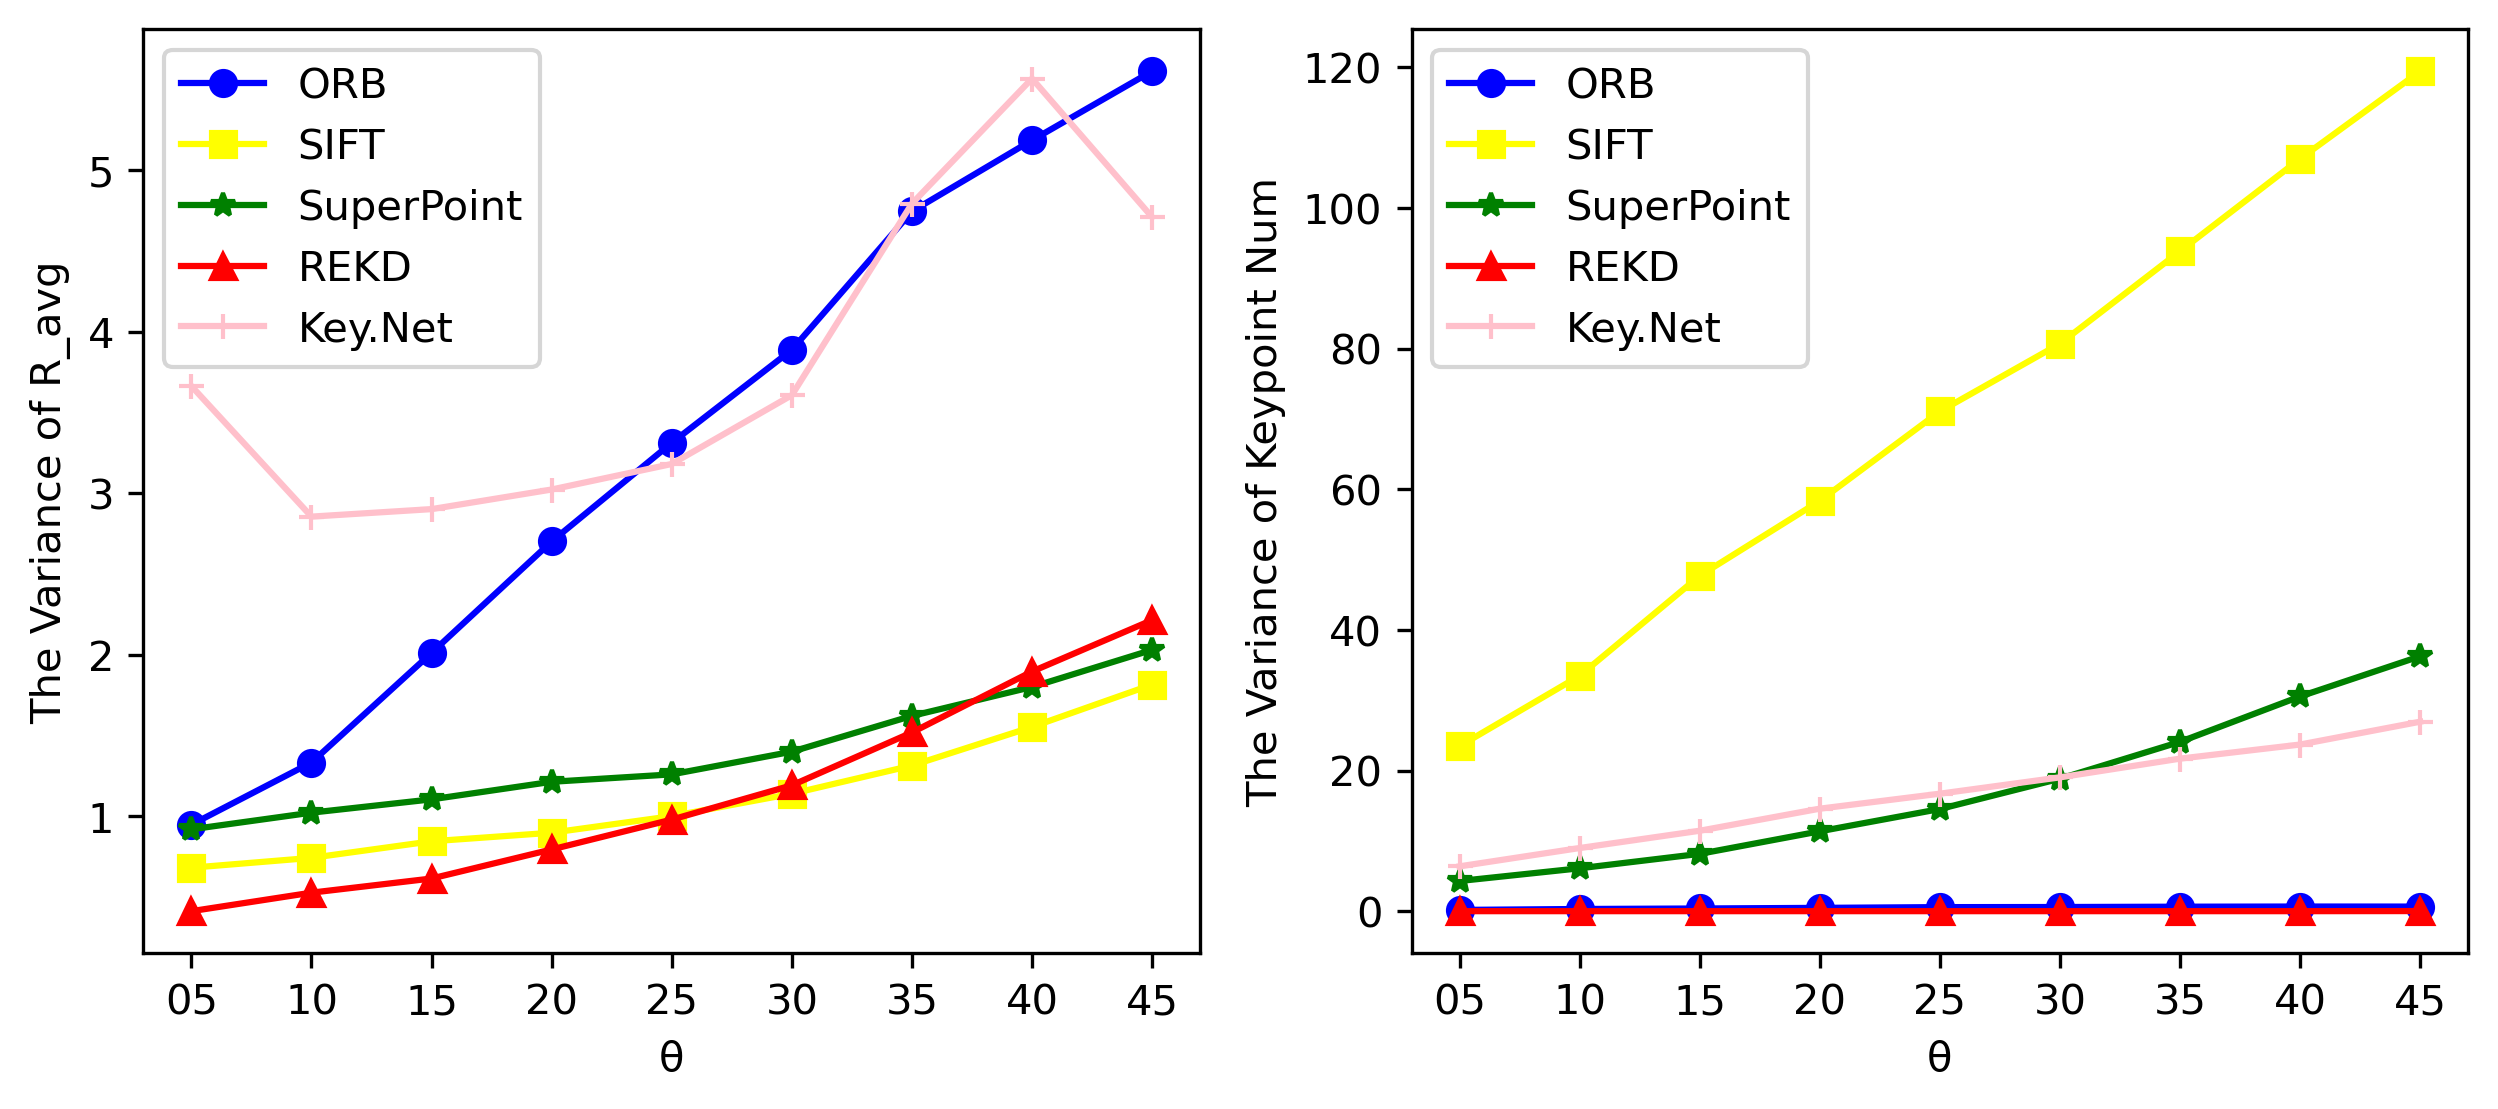

In [8]:
# 方差
trans_type = 'perspective'
direction = None
level = None

get_visual_var_average(path_dataset,model,trans_type,direction,level)